In [41]:
import numpy as np 
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from pandas.api.types import CategoricalDtype
pd.set_option('display.max_columns', 100)

In [128]:
df = pd.read_csv('cleaned_df', index_col = 0)

First, let's see our distribution of housing prices

In [130]:
df['price'].describe()

count    1.724900e+04
mean     5.380254e+05
std      3.545868e+05
min      7.500000e+04
25%      3.209000e+05
50%      4.500000e+05
75%      6.450000e+05
max      5.300000e+06
Name: price, dtype: float64

In [131]:
 5.300000e+06

5300000.0

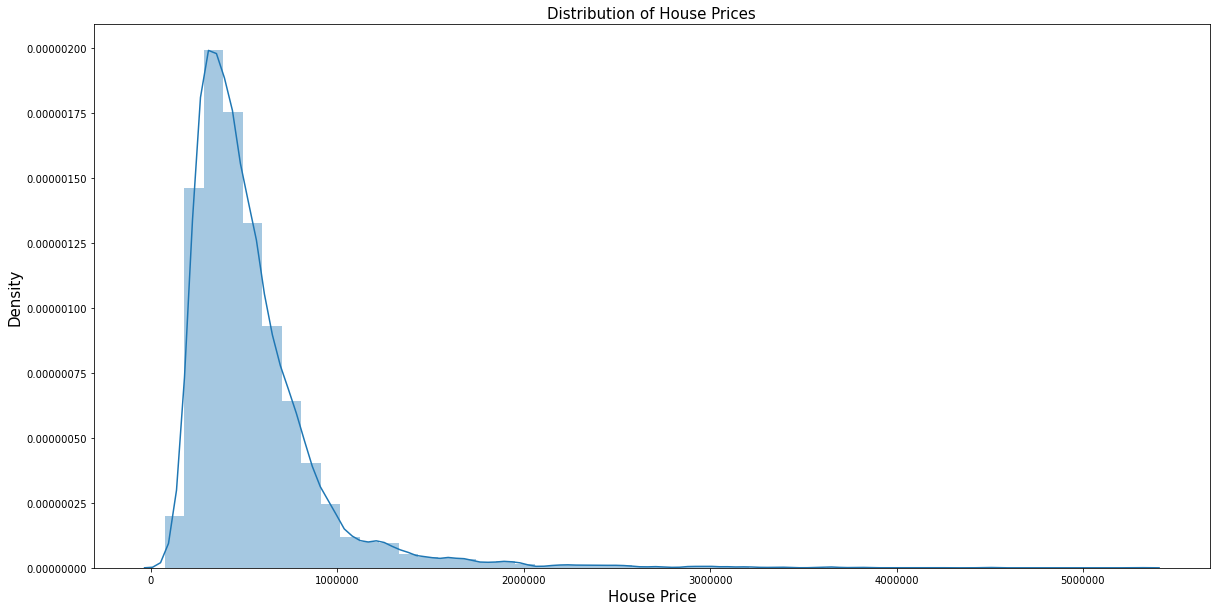

In [4]:
fig,ax = plt.subplots(figsize = (20,10))

ax = sns.distplot(df['price'])
ax.set_title('Distribution of House Prices', fontsize = 15)
ax.set_xlabel('House Price', fontsize = 15)
ax.set_ylabel('Density', fontsize = 15)
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.show()

Fairly normal but very right skewed.

Let look at a correlation matrix of some of your key variables

In [ ]:
[
 'price',
 'bedrooms',
 'bathrooms',
 'excess_bathrooms'
 'sqft_living',
 'sqft_lot',
 'view',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'years_since_most_recent_construction',
 'yard',
 'zip_median_income',
 'zip_mean_income']
 

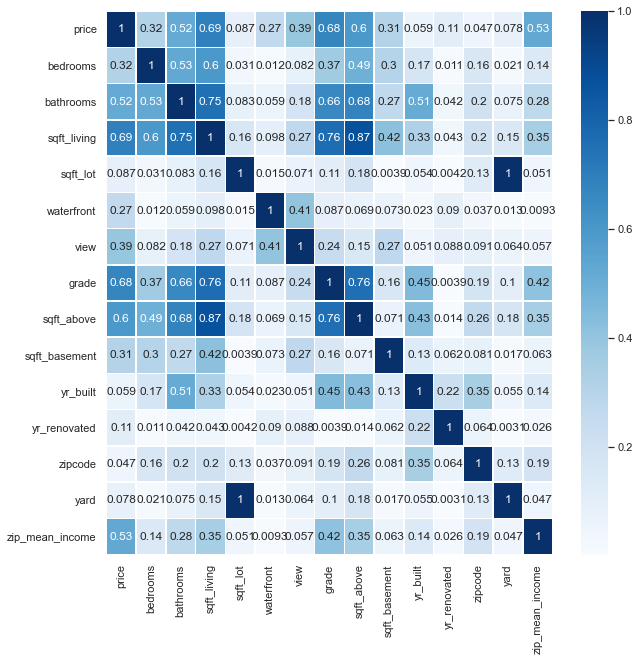

In [116]:

sns.set(rc={'figure.figsize':(10, 10)})
sns.heatmap(df.loc[:,[
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
    'waterfront',
 'view',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'yard',
 'zip_mean_income']]b
plt.show()

One area we should look into further is zipcode mean income and price.

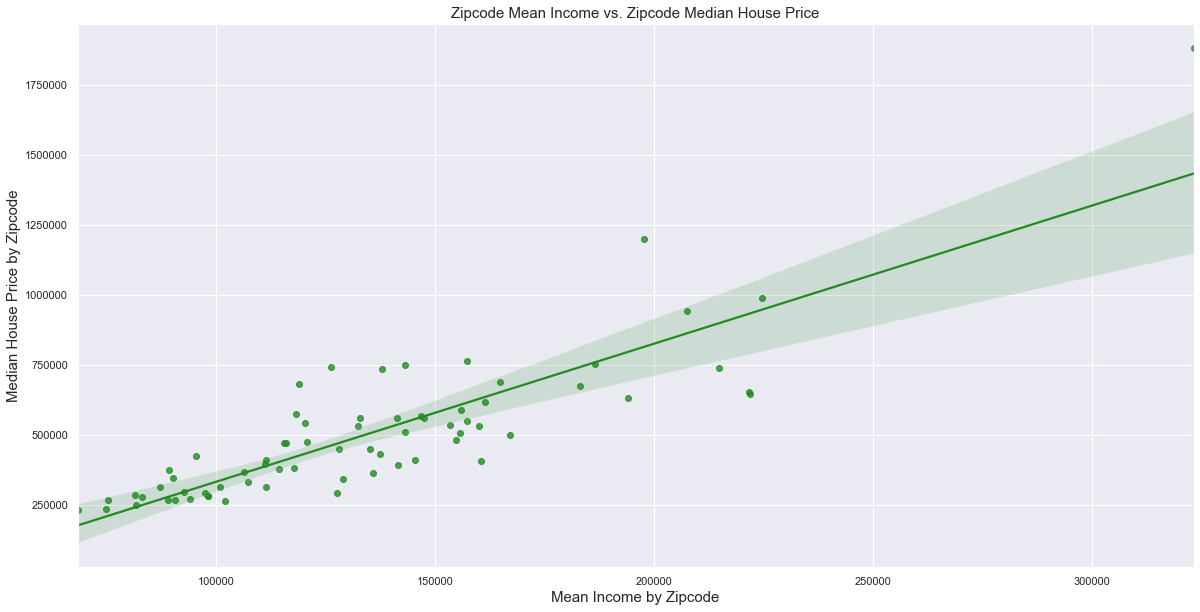

In [91]:
fig,ax = plt.subplots(figsize = (20,10))
x = df.groupby('zip_mean_income').agg({'price': 'median','zip_mean_income': 'mean'})['zip_mean_income']
y = df.groupby('zip_mean_income').agg({'price': 'median','zip_mean_income': 'median'})['price']
ax = sns.regplot(x,y, color = 'forestgreen')
ax.set_title('Zipcode Mean Income vs. Zipcode Median House Price', fontsize = 15)
ax.set_xlabel('Mean Income by Zipcode', fontsize = 15)
ax.set_ylabel('Median House Price by Zipcode', fontsize = 15)

ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

In [62]:
df[df['zip_mean_income'] == df['zip_mean_income'].max()].count()

id                               40
date                             40
price                            40
bedrooms                         40
bathrooms                        40
                                 ..
decade_built_adjusted_1970s      40
decade_built_adjusted_1980s      40
decade_built_adjusted_1990s      40
decade_built_adjusted_2000s      40
decade_built_adjusted_Pre-war    40
Length: 82, dtype: int64

In [61]:
df.groupby('zipcode').count()['price'].mean()

246.4142857142857

A nice linear relationship
Lets also look at 

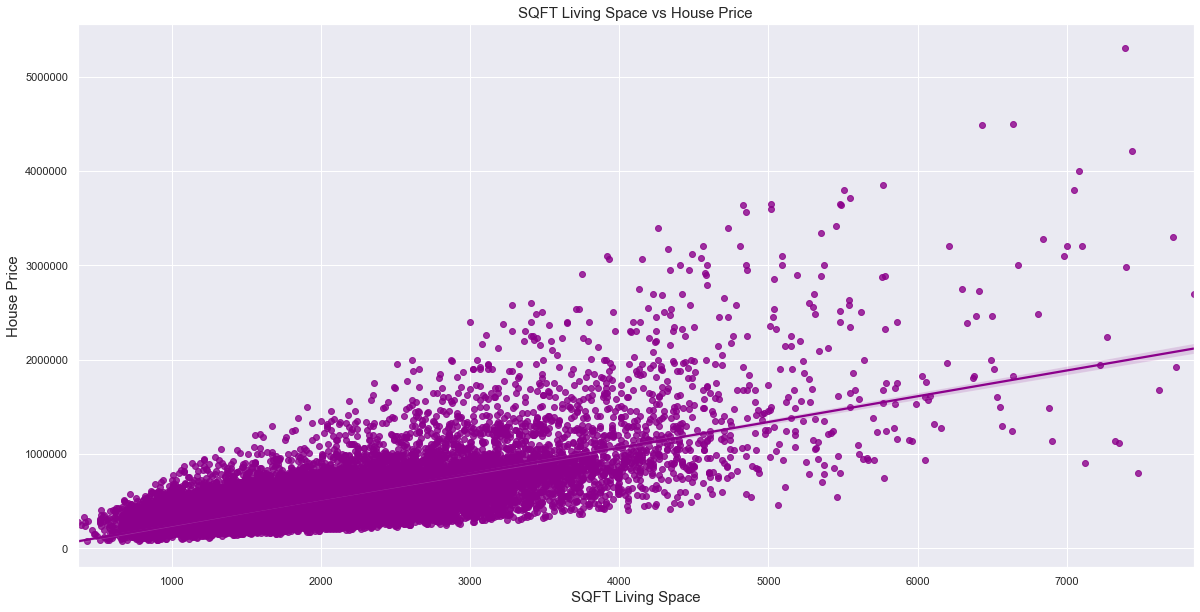

In [90]:
fig,ax = plt.subplots(figsize = (20,10))

ax = sns.regplot(x =df['sqft_living'], y = df['price'], color = 'darkmagenta' )
ax.set_title('SQFT Living Space vs House Price', fontsize = 15)
ax.set_xlabel('SQFT Living Space', fontsize = 15)
ax.set_ylabel('House Price', fontsize = 15)

ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

In [29]:
df.groupby('excess_bathrooms_cat').median()['price'].sort_values()

excess_bathrooms_cat
2_or_less    400000.0
1_less       445000.0
parity       491150.0
1_or_more    605000.0
Name: price, dtype: float64

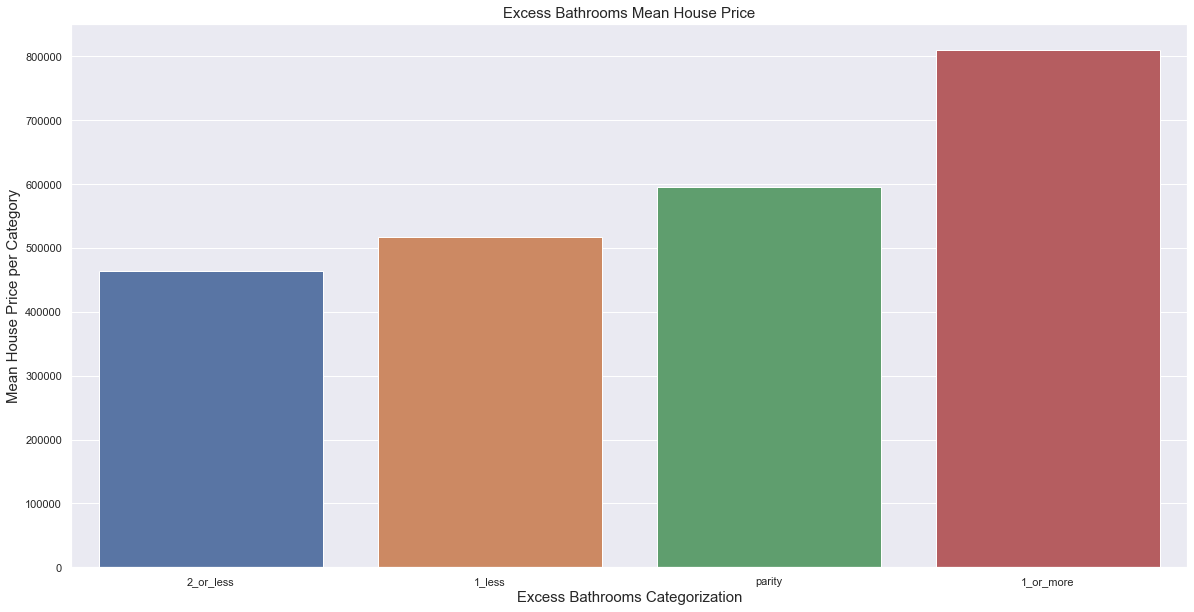

In [134]:
fig,ax = plt.subplots(figsize = (20,10))
x = df.groupby('excess_bathrooms_cat').mean()['price'].sort_values().index
y = df.groupby('excess_bathrooms_cat').mean()['price'].sort_values()
ax = sns.barplot(x,y)
ax.set_title('Excess Bathrooms Mean House Price', fontsize = 15)
ax.set_xlabel('Excess Bathrooms Categorization', fontsize = 15)
ax.set_ylabel('Mean House Price per Category', fontsize = 15)
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

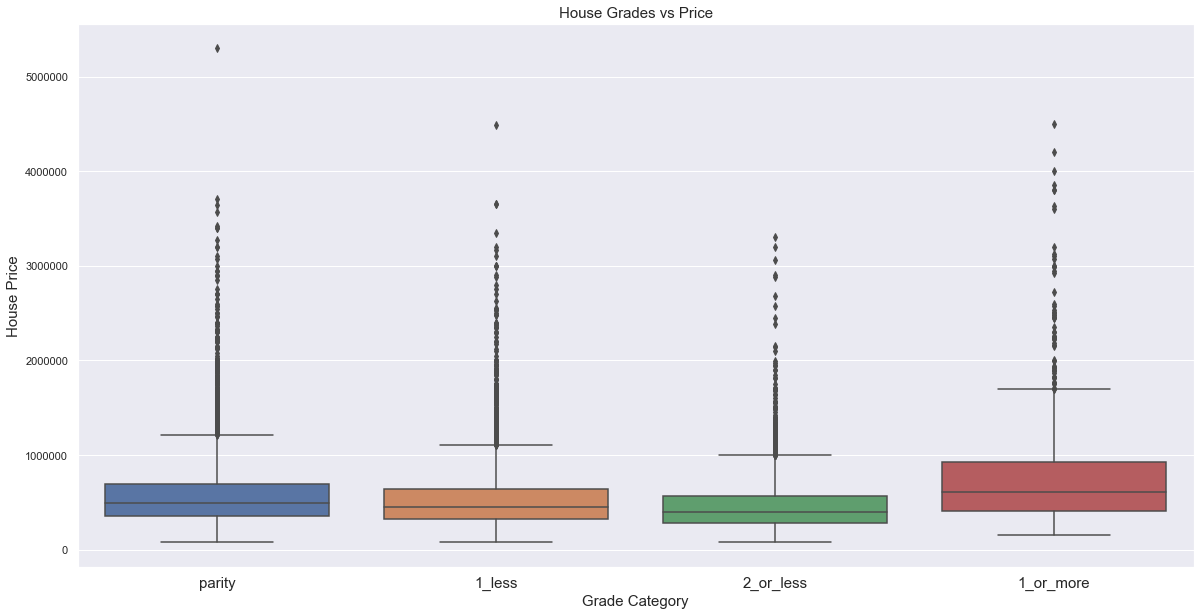

In [84]:
fig,ax = plt.subplots(figsize = (20,10))
ax = sns.boxplot(x='excess_bathrooms_cat', y='price', data=df.sort_values('price'))
ax.set_title('House Grades vs Price', fontsize = 15)
ax.set_xlabel('Grade Category', fontsize = 15)
ax.set_ylabel('House Price', fontsize = 15)
plt.xticks(fontsize= 15)
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

In [129]:
stats.ttest_ind(df[df['excess_bathrooms_cat'] == 'parity']['price'], df[df['excess_bathrooms_cat']== '1_less']['price'], equal_var = True)

Ttest_indResult(statistic=12.264059519585869, pvalue=2.2243642909420178e-34)

ax = sns.lineplot(x = 'decade_built', y = 'price', data = df)
ax.set_title('Decade Built vs. Housing Price')
plt.show()

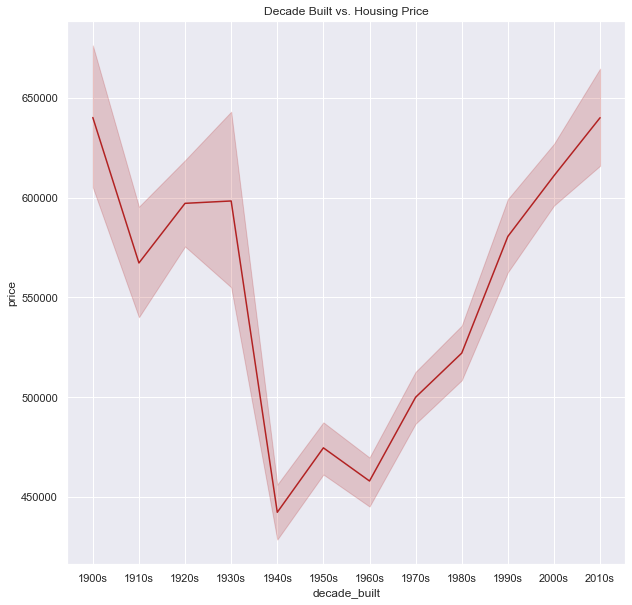

In [86]:
ax = sns.lineplot(x = 'decade_built', y = 'price', data = df, color = 'firebrick')
ax.set_title('Decade Built vs. Housing Price')
plt.show()

Interestingly, housing prices for houses built before the 1940's are relatively high, but houses prices for those constructed  in the 1940s and shortly thereafter drop steeply. From there, house prices rise as newer constructions sell for more on average. There must be architectural or structural appeal to pre-war houses. 

---

Now lets looks at grades. One thing to note is the grades range from 3 to 13. There are not a lot of grades 3,4,5 nor 11,12, and 13. Lets test each of these groups in an ANOVA test to see if the mean house prices are different for each categorical grouping. 

In [73]:
df.groupby('grade').count()['id']

grade
3        2
4       20
5      192
6     1647
7     7163
8     4844
9     2098
10     893
11     316
12      67
13       7
Name: id, dtype: int64

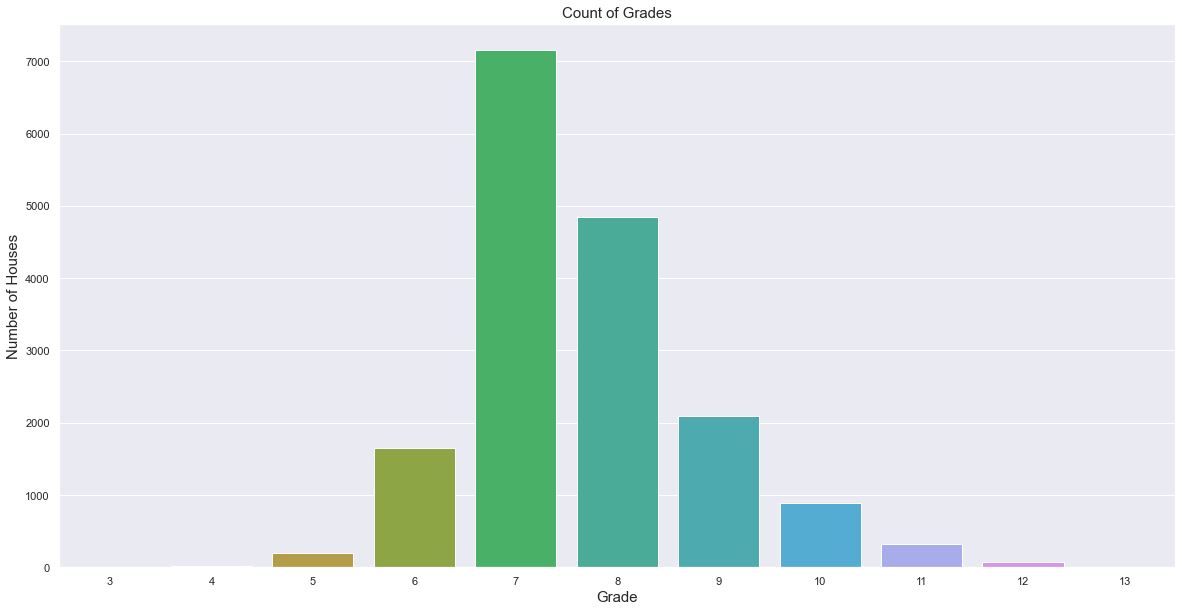

In [126]:
fig,ax = plt.subplots(figsize = (20,10))
x = df.groupby('grade').count()['id'].index
y = df.groupby('grade').count()['id']
# ax.bar(x,y, color = 'g')
ax = sns.barplot(x,y)
ax.set_title('Count of Grades', fontsize = 15)
ax.set_xlabel('Grade', fontsize = 15)
ax.set_ylabel('Number of Houses', fontsize = 15)
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

Setting alpha level of .05 we cannot reject the null that mean house price is the same for houses with grade 3,4 and 5 since pvalue > alpha. Therefor, I will bin these grades into 1 category labeled low_grade. 

In [38]:

stats.f_oneway(df[df['grade'] == 3]['price'],
                df[df['grade'] == 4]['price'], 
                df[df['grade'] == 5]['price'],
                )

F_onewayResult(statistic=1.5266019792886714, pvalue=0.21966265463909543)

Setting alpha level of .05 we can reject the null that mean house price is the same for houses with grade 11,12, and and 13 since pvalue < alpha. Therefore, I will leave these grades categorized as is.

In [40]:
stats.f_oneway(df[df['grade'] == 11]['price'],
                df[df['grade'] == 12]['price'], 
                df[df['grade'] == 13]['price'],
                )

F_onewayResult(statistic=40.92511592584165, pvalue=7.532976070559968e-17)

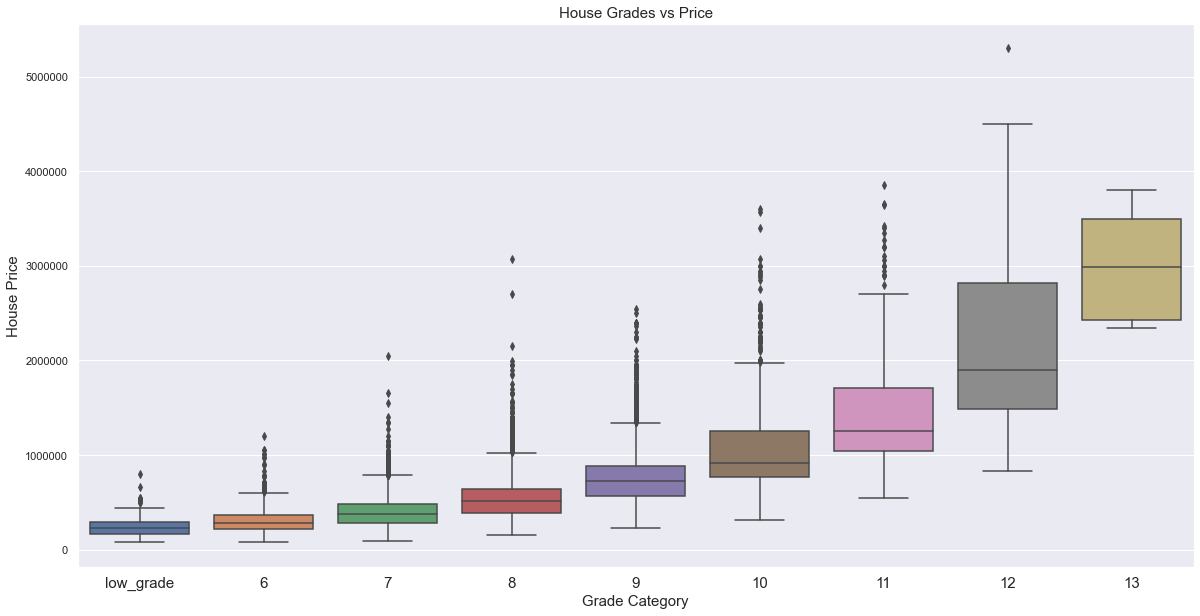

In [46]:
fig,ax = plt.subplots(figsize = (20,10))
ax = sns.boxplot(x="grade_cat", y="price", data=df.sort_values('price'))
ax.set_title('House Grades vs Price', fontsize = 15)
ax.set_xlabel('Grade Category', fontsize = 15)
ax.set_ylabel('House Price', fontsize = 15)
plt.xticks(fontsize= 15)
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

In [ ]:
#Add analysis of views or waterfront

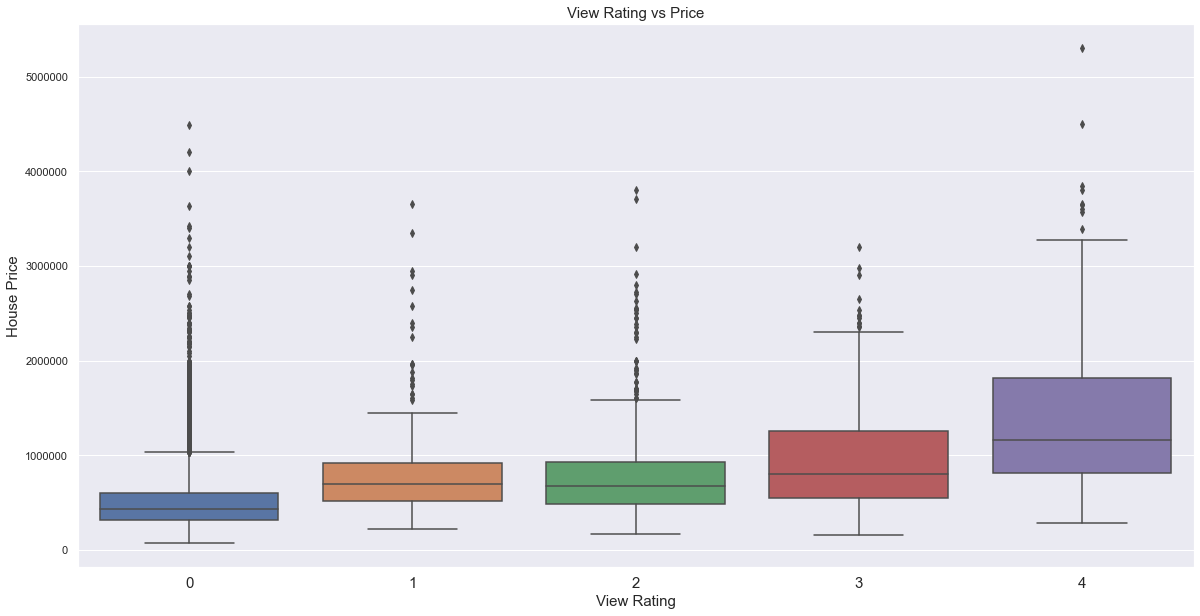

In [107]:
fig,ax = plt.subplots(figsize = (20,10))
ax = sns.boxplot(x="view", y="price", data=df.sort_values('price'))
ax.set_title('View Rating vs Price', fontsize = 15)
ax.set_xlabel('View Rating', fontsize = 15)
ax.set_ylabel('House Price', fontsize = 15)
plt.xticks(fontsize= 15)
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

In [101]:
stats.ttest_ind(df[df['view'] == 1]['price'], df[df['view']== 2]['price'], equal_var = True)

Ttest_indResult(statistic=1.2444987282962698, pvalue=0.21359807458096547)

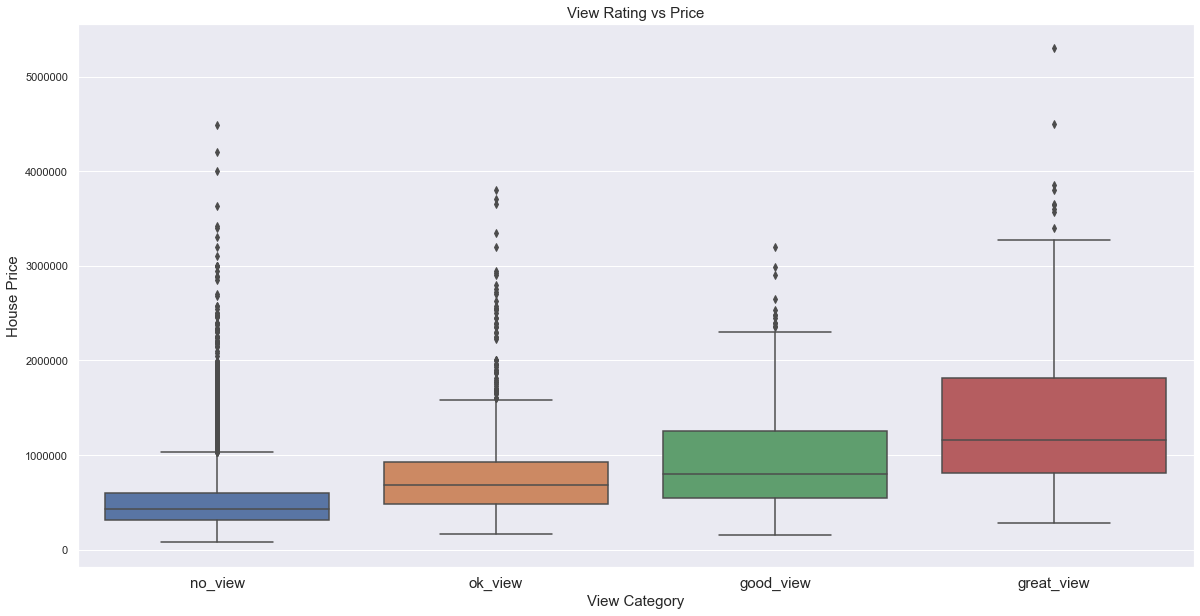

In [108]:
fig,ax = plt.subplots(figsize = (20,10))
ax = sns.boxplot(x="view_cat", y="price", data=df)
ax.set_title('View Rating vs Price', fontsize = 15)
ax.set_xlabel('View Category', fontsize = 15)
ax.set_ylabel('House Price', fontsize = 15)
plt.xticks(fontsize= 15)
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

---

Now lets look run a regression to get actionable insights

In [109]:
df_dummy = pd.get_dummies(df, columns=['season_sold', 'condition', 'condition_adjusted'], drop_first=True)
df_dummy = pd.get_dummies(df_dummy, columns = ['grade_cat']).drop(columns = 'grade_cat_low_grade', axis = 1)
df_dummy = pd.get_dummies(df_dummy, columns = ['view_cat']).drop(columns = 'view_cat_no_view', axis = 1)
df_dummy = pd.get_dummies(df_dummy, columns = ['excess_bathrooms_cat']).drop(columns = 'excess_bathrooms_cat_parity', axis = 1)
df_dummy = pd.get_dummies(df_dummy, columns = ['excess_bathrooms']).drop(columns = 'excess_bathrooms_-0.0', axis = 1)
df_dummy = pd.get_dummies(df_dummy, columns = ['decade_built']).drop(columns = 'decade_built_2010s', axis = 1)
df = pd.get_dummies(df_dummy, columns = ['decade_built_adjusted']).drop(columns = 'decade_built_adjusted_2010s', axis = 1)

In [117]:
reg_c = [
 'sqft_living',
 'zip_mean_income',
 'view_cat_great_view',
 'view_cat_good_view',
 'view_cat_ok_view',
 'excess_bathrooms_cat_2_or_less',
 'excess_bathrooms_cat_1_less',
 'excess_bathrooms_cat_1_or_more',
 'decade_built_adjusted_Pre-war',
 'decade_built_adjusted_1940s',
 'decade_built_adjusted_1950s',
 'decade_built_adjusted_1960s',
 'decade_built_adjusted_1970s',
 'decade_built_adjusted_1980s',
 'decade_built_adjusted_1990s',
 'decade_built_adjusted_2000s',
 'grade_cat_6',
 'grade_cat_7',
 'grade_cat_8',
 'grade_cat_9',
 'grade_cat_10',
 'grade_cat_11',
 'grade_cat_12',
 'grade_cat_13'
]

In [125]:
X = sm.add_constant(df.loc[:,reg_c])
y = df['price']

model = sm.OLS(endog=y, exog=X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     2015.
Date:                Wed, 10 Mar 2021   Prob (F-statistic):               0.00
Time:                        14:40:13   Log-Likelihood:            -2.3336e+05
No. Observations:               17249   AIC:                         4.668e+05
Df Residuals:                   17224   BIC:                         4.670e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -3.104e+05    1.5e+04    -20.735      0.000    -3.4e+05   -2.81e+05
sqft_living                      130.7531      2.487     52.574      0.000     125.878     135.628
zip_mean_income                    2.6174      0.040     66.086      0.000       2.540       2.695
view_cat_great_view             4.954e+05   1.17e+04     42.459      0.000    4.72e+05    5.18e+05
view_cat_good_view               1.52e+05   9351.959     16.257      0.000    1.34e+05     1.7e+05
view_cat_ok_view                8.696e+04   6013.605     14.461      0.000    7.52e+04    9.88e+04
excess_bathrooms_cat_2_or_less -4.569e+04   4482.662    -10.192      0.000   -5.45e+04   -3.69e+04
excess_bathrooms_cat_1_less    -3.011e+04   3546.987     -8.489      0.000   -3.71e+04   -2.32e+04
excess_bathrooms_cat_1_or_more  6.064e+04   7522.190      8.062      0.000    4.59e+04    7.54e+04
decade_built_adjusted_Pre-war   1.915e+05   7354.343     26.045      0.000    1.77e+05    2.06e+05
decade_built_adjusted_1940s     1.319e+05   8266.257     15.961      0.000    1.16e+05    1.48e+05
decade_built_adjusted_1950s     8.842e+04   7641.445     11.571      0.000    7.34e+04    1.03e+05
decade_built_adjusted_1960s       3.2e+04   7451.878      4.294      0.000    1.74e+04    4.66e+04
decade_built_adjusted_1970s    -2.224e+04   7445.336     -2.987      0.003   -3.68e+04   -7647.103
decade_built_adjusted_1980s    -5.402e+04   7292.946     -7.407      0.000   -6.83e+04   -3.97e+04
decade_built_adjusted_1990s    -8.758e+04   7287.477    -12.018      0.000   -1.02e+05   -7.33e+04
decade_built_adjusted_2000s    -4.866e+04   6802.708     -7.152      0.000    -6.2e+04   -3.53e+04
grade_cat_6                     6.359e+04   1.33e+04      4.799      0.000    3.76e+04    8.96e+04
grade_cat_7                     1.405e+05   1.29e+04     10.885      0.000    1.15e+05    1.66e+05
grade_cat_8                     2.044e+05   1.34e+04     15.278      0.000    1.78e+05    2.31e+05
grade_cat_9                      3.06e+05   1.43e+04     21.386      0.000    2.78e+05    3.34e+05
grade_cat_10                    4.614e+05   1.57e+04     29.333      0.000    4.31e+05    4.92e+05
grade_cat_11                    7.143e+05   1.87e+04     38.142      0.000    6.78e+05    7.51e+05
grade_cat_12                    1.219e+06   2.83e+04     43.069      0.000    1.16e+06    1.27e+06
grade_cat_13                    1.875e+06   7.13e+04     26.311      0.000    1.74e+06    2.01e+06
==============================================================================
Omnibus:                     9550.359   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           263590.126
Skew:                           2.132   Prob(JB):                         

In [138]:
features= [
 'sqft_living',
 'zip_mean_income',
 'view_cat_great_view',
 'view_cat_good_view',
 'view_cat_ok_view',
 'excess_bathrooms_cat_2_or_less',
 'excess_bathrooms_cat_1_less',
 'excess_bathrooms_cat_1_or_more',
 'decade_built_adjusted_Pre-war',
 'decade_built_adjusted_1940s',
 'decade_built_adjusted_1950s',
 'decade_built_adjusted_1960s',
 'decade_built_adjusted_1970s',
 'decade_built_adjusted_1980s',
 'decade_built_adjusted_1990s',
 'decade_built_adjusted_2000s',
 'grade_cat_6',
 'grade_cat_7',
 'grade_cat_8',
 'grade_cat_9',
 'grade_cat_10',
 'grade_cat_11',
 'grade_cat_12',
 'grade_cat_13'
]
len(features)

24